In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import math
import sklearn
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)         

np.set_printoptions(suppress=True)
# To make our data and models replicable 
np.random.seed(5508)
sklearn.__version__

AttributeError: module 'numpy' has no attribute 'warnings'

### 1. Data Exploration
Before we work on the data, we want to explore and find out some information and scope about the data that we are working with. Additionally, it is important for us to deal with any dirty data, for example, missing values and invalid values. 

Having an appreciation and understanding of the data will enable us to interpret the results of any model well.

#### Reading the data 

In [3]:
training_set = pd.read_csv('training.csv')
test_set = pd.read_csv('testing.csv')

In [4]:
training_set.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [5]:
test_set.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [6]:
print(training_set.columns)

Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')


In [7]:
np.unique(training_set['class'])

array(['d', 'h', 'o', 's'], dtype=object)

Taking a look at the first 5 observations at both training and test datasets provided to us, we observe that there is a class variable, and 9 other numerical variables labelled b1-b9. We are not entirely sure what these covariates represent because we are not given much information about them, so we'll just take them as they are. 

Also, there are also prediction variables somehow included in the dataset, which might not be relevant to our study, so we'll omit them as well. 

In [8]:
# Create a mask function to omit pred variables
def var_omit(dataset):
    mask = [] # creates an empty list
    for col in training_set:
        if not col.startswith('pred_minus_obs'): 
            mask.append(col) # add column to list if it does not start with pred
    data = dataset[mask] # applies the mask 
    return(data) # return the new dataset with appropriate columns

In [9]:
training_set, test_set = var_omit(training_set), var_omit(test_set)

A look at the datasets with omitted pred variables looks ok. 

In [10]:
training_set, test_set

(    class  b1  b2  b3   b4  b5   b6   b7  b8  b9
 0       d  67  51  68  115  69  111  136  31  67
 1       s  67  28  51   99  50   97   82  26  59
 2       s  63  26  50   95  49   91   81  26  57
 3       d  63  42  63   97  66  108  111  28  59
 4       s  46  27  50   83  51   90   76  26  56
 ..    ...  ..  ..  ..  ...  ..  ...  ...  ..  ..
 320     o  55  56  72   91  79  113   86  35  68
 321     d  69  49  76   91  52   91   92  25  57
 322     s  49  26  48  107  59  104   62  22  53
 323     s  55  26  52   92  55   98   65  23  56
 324     h  71  28  51   96  46   88   92  25  58
 
 [325 rows x 10 columns],
     class  b1  b2  b3   b4  b5   b6   b7  b8  b9
 0       d  39  36  57   91  59  101   93  27  60
 1       h  84  30  57  112  51   98   92  26  62
 2       s  53  25  49   99  51   93   84  26  58
 3       s  59  26  49  103  47   92   82  25  56
 4       d  57  49  66  103  64  106  114  28  59
 ..    ...  ..  ..  ..  ...  ..  ...  ...  ..  ..
 193     d  55  61  90

#### Data Visualisation and Cleaning

In [11]:
training_set.dtypes
datasets = [training_set, test_set]

We observe that the datatypes for the 

In [12]:
# Check for any missing values in the datasets (train and test), vector dimensions have to match
def missing_value_test(datasets):
    missing_value = np.array(datasets[0].isnull().sum())
    colnames = datasets[0].columns
    for data in datasets[1:]:
        dm = np.array(data.isnull().sum())
        missing_value = np.stack((missing_value, dm))
    df = pd.DataFrame(missing_value, columns=colnames, index=['train','test'])
    return(df)

missing_value_test(datasets)

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
train,0,0,0,0,0,0,0,0,0,0
test,0,0,0,0,0,0,0,0,0,0


Data for both the training set and the test set look to be okay for now, no missing values so given data is clean. Hence, there is no need to deal with or impute missing data. 

Next, we use the describe method to look at some summary statistics of the two datasets. This will give us a rough idea of any huge outliers in the data, if any. As of now, no observable disparity of data between the 2 sets, and the min and max values look to be alright with no outliers. 

In [13]:
training_set.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000


In [14]:
test_set.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000


Perhaps we can better visualise this using a boxplot. 

Text(0.5, 0.98, 'Boxplot of b1-b9 variables')

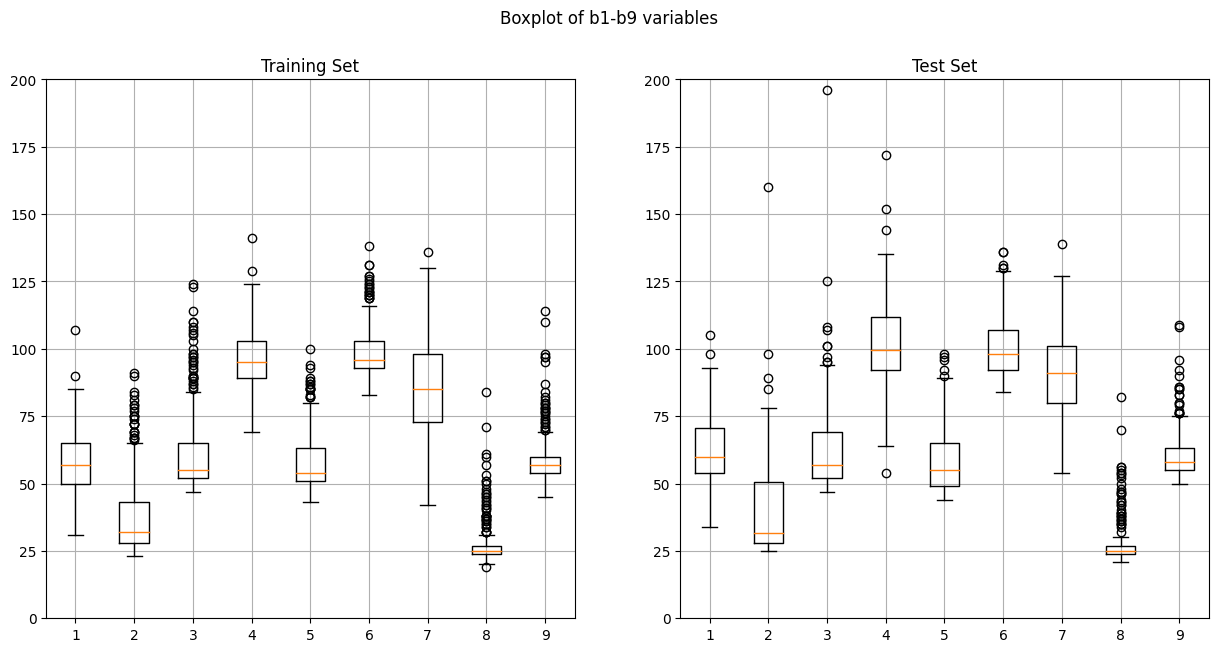

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].boxplot(np.array(training_set)[:,1:])
ax[1].boxplot(np.array(test_set)[:,1:])
ax[0].set_title('Training Set')
ax[1].set_title('Test Set')
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Boxplot of b1-b9 variables')

By looking at the boxplots of the numerical variables, for both the training and the test sets, we are able to tell that there are quite a fair few number of outliers that fall outside the IQR range on some of these variables. However, the pattern of the 9 covariates looks acceptable between the 2 sets.

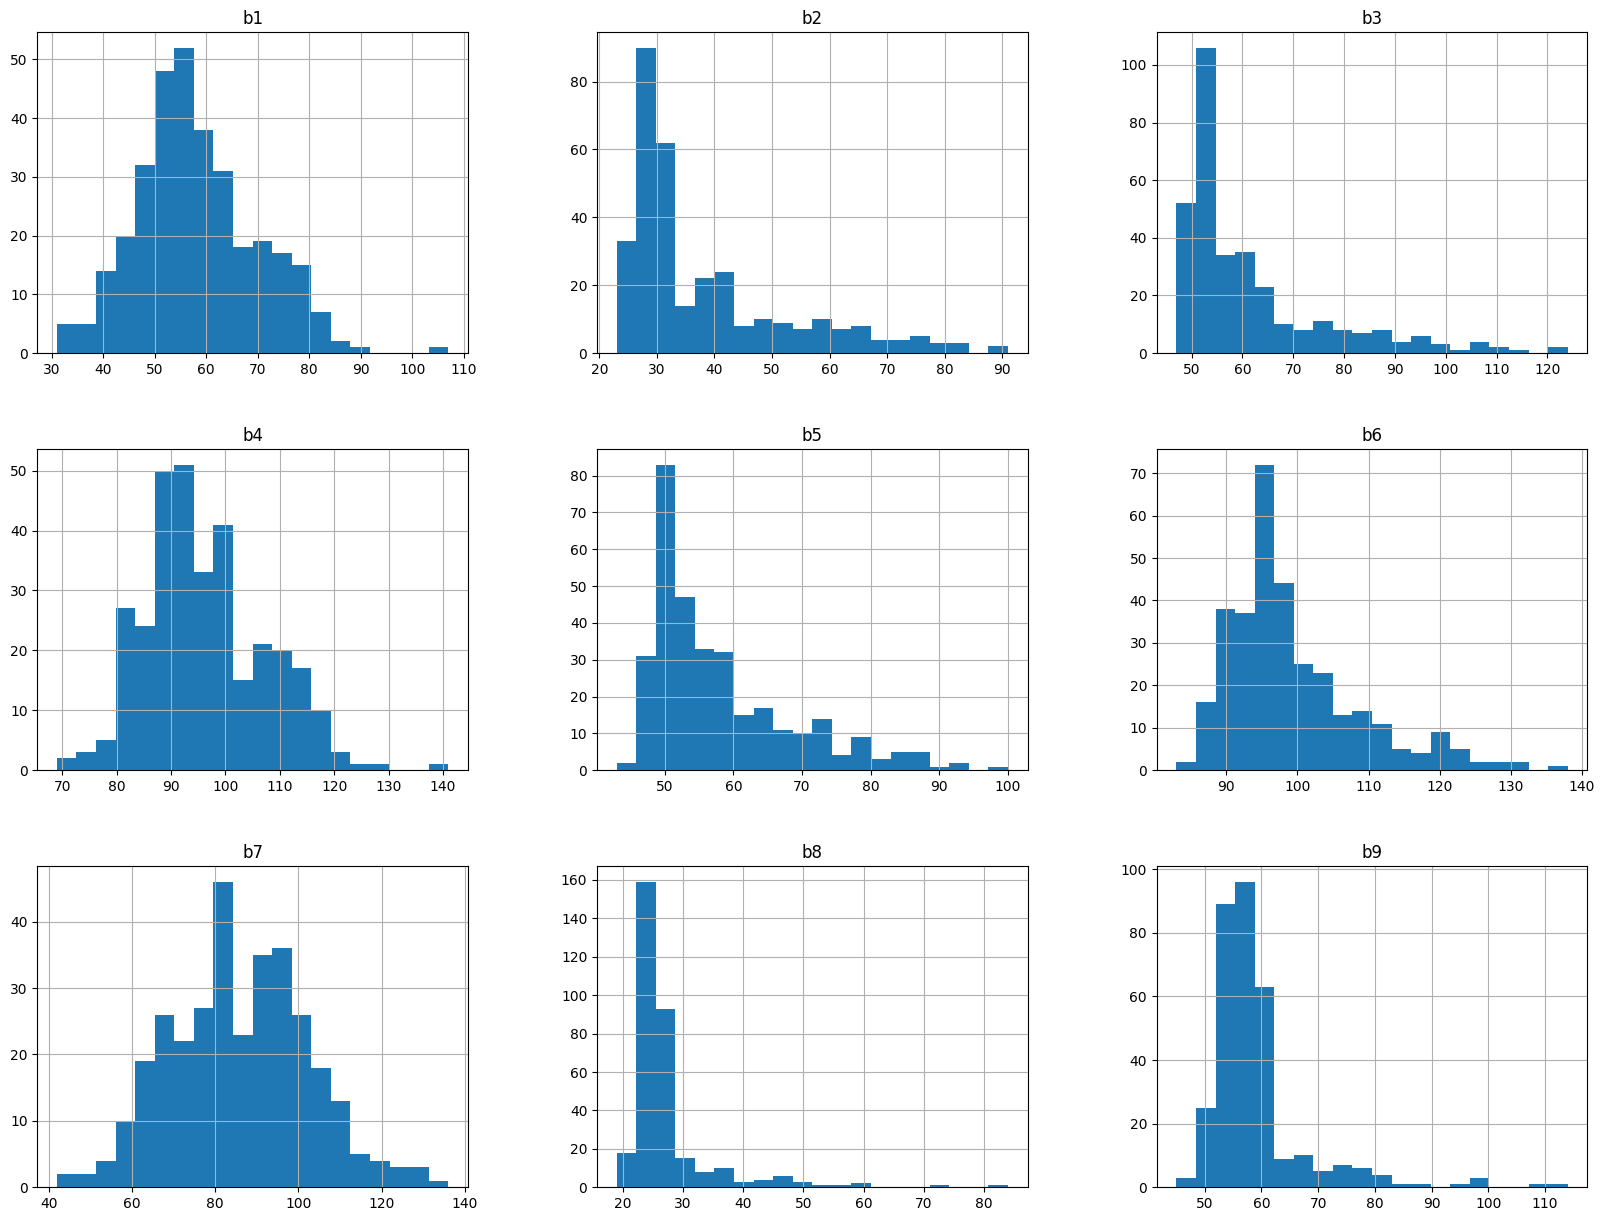

In [16]:
training_set.hist(bins=20, figsize=(20,15))
plt.show()

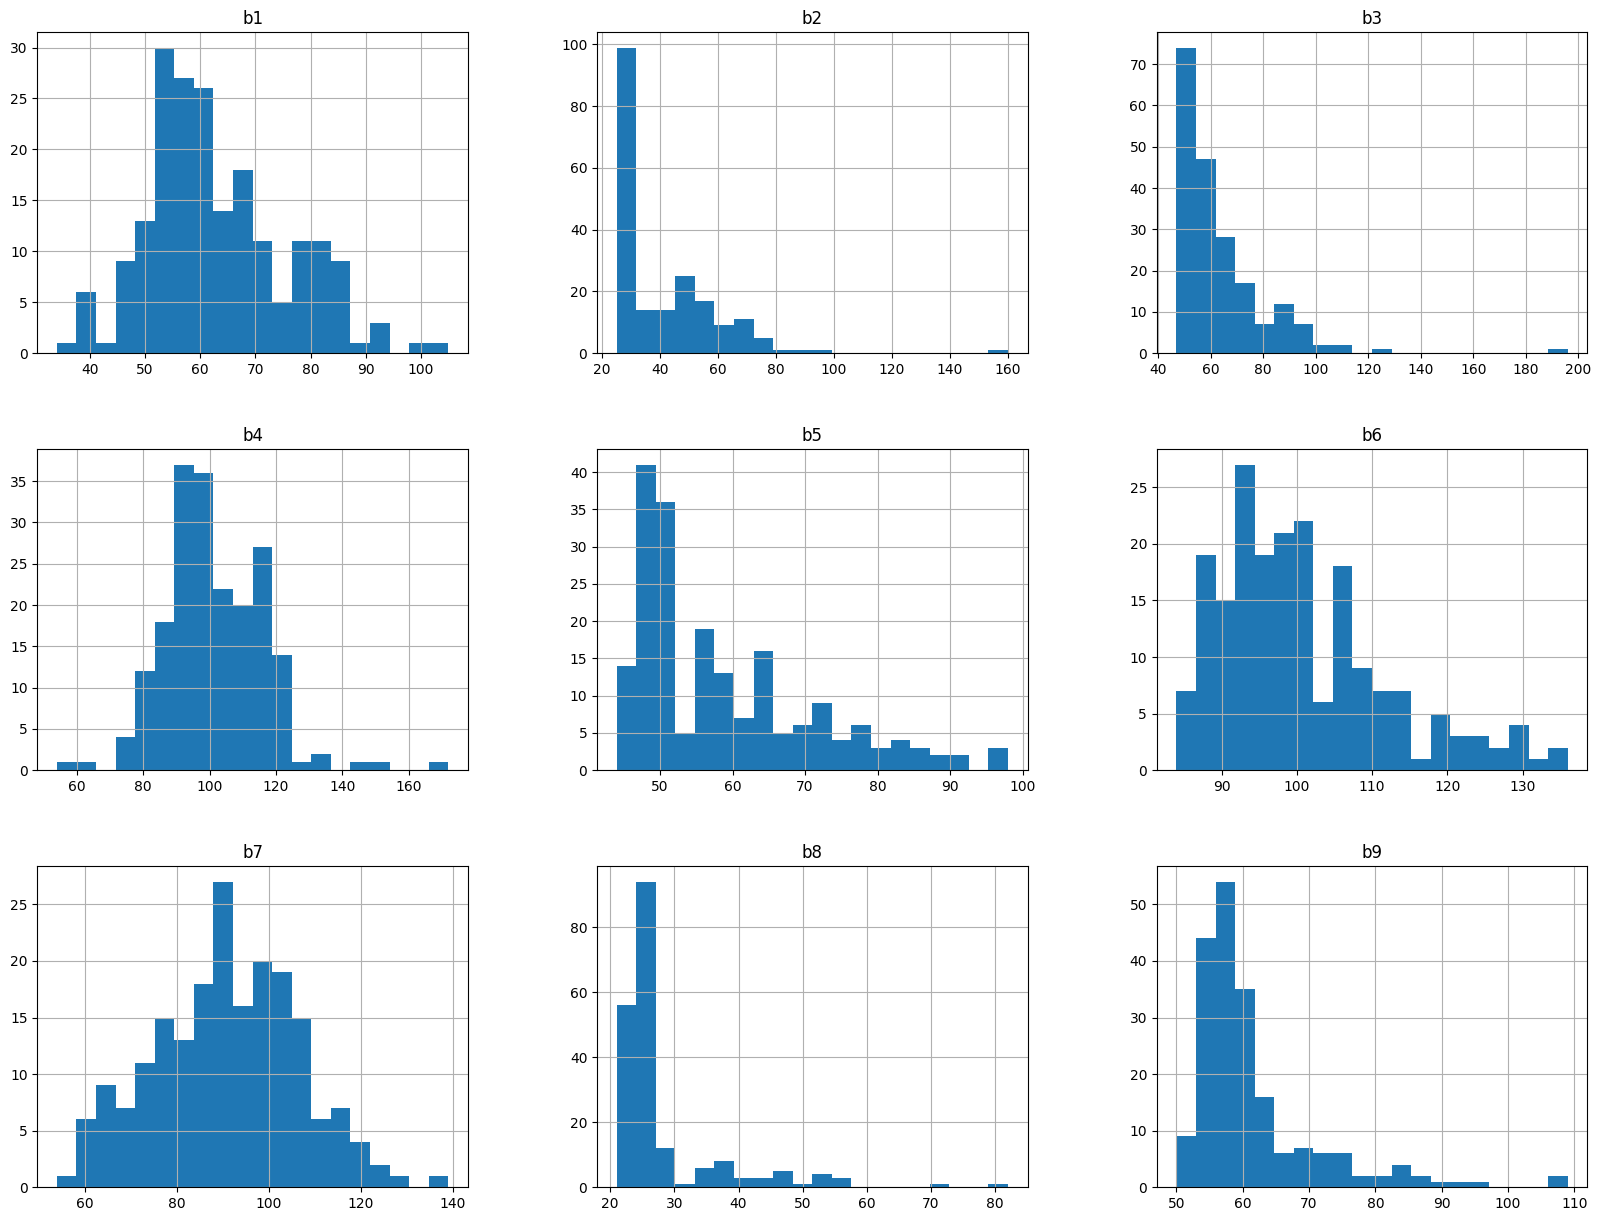

In [17]:
test_set.hist(bins=20, figsize=(20,15))
plt.show()

Histogram plots between the two sets look similar, no discernable disparity between the two, so the split is ok

Next, we want to start looking at the training set more in depth. First, we want to see if there any instance imbalances between the 4 classes (d, h, o, s). After this, we would also like to see if there are any relationships between the covariates, so a correlation plot or rather a pairs plot and some correlation scores would be helpful.

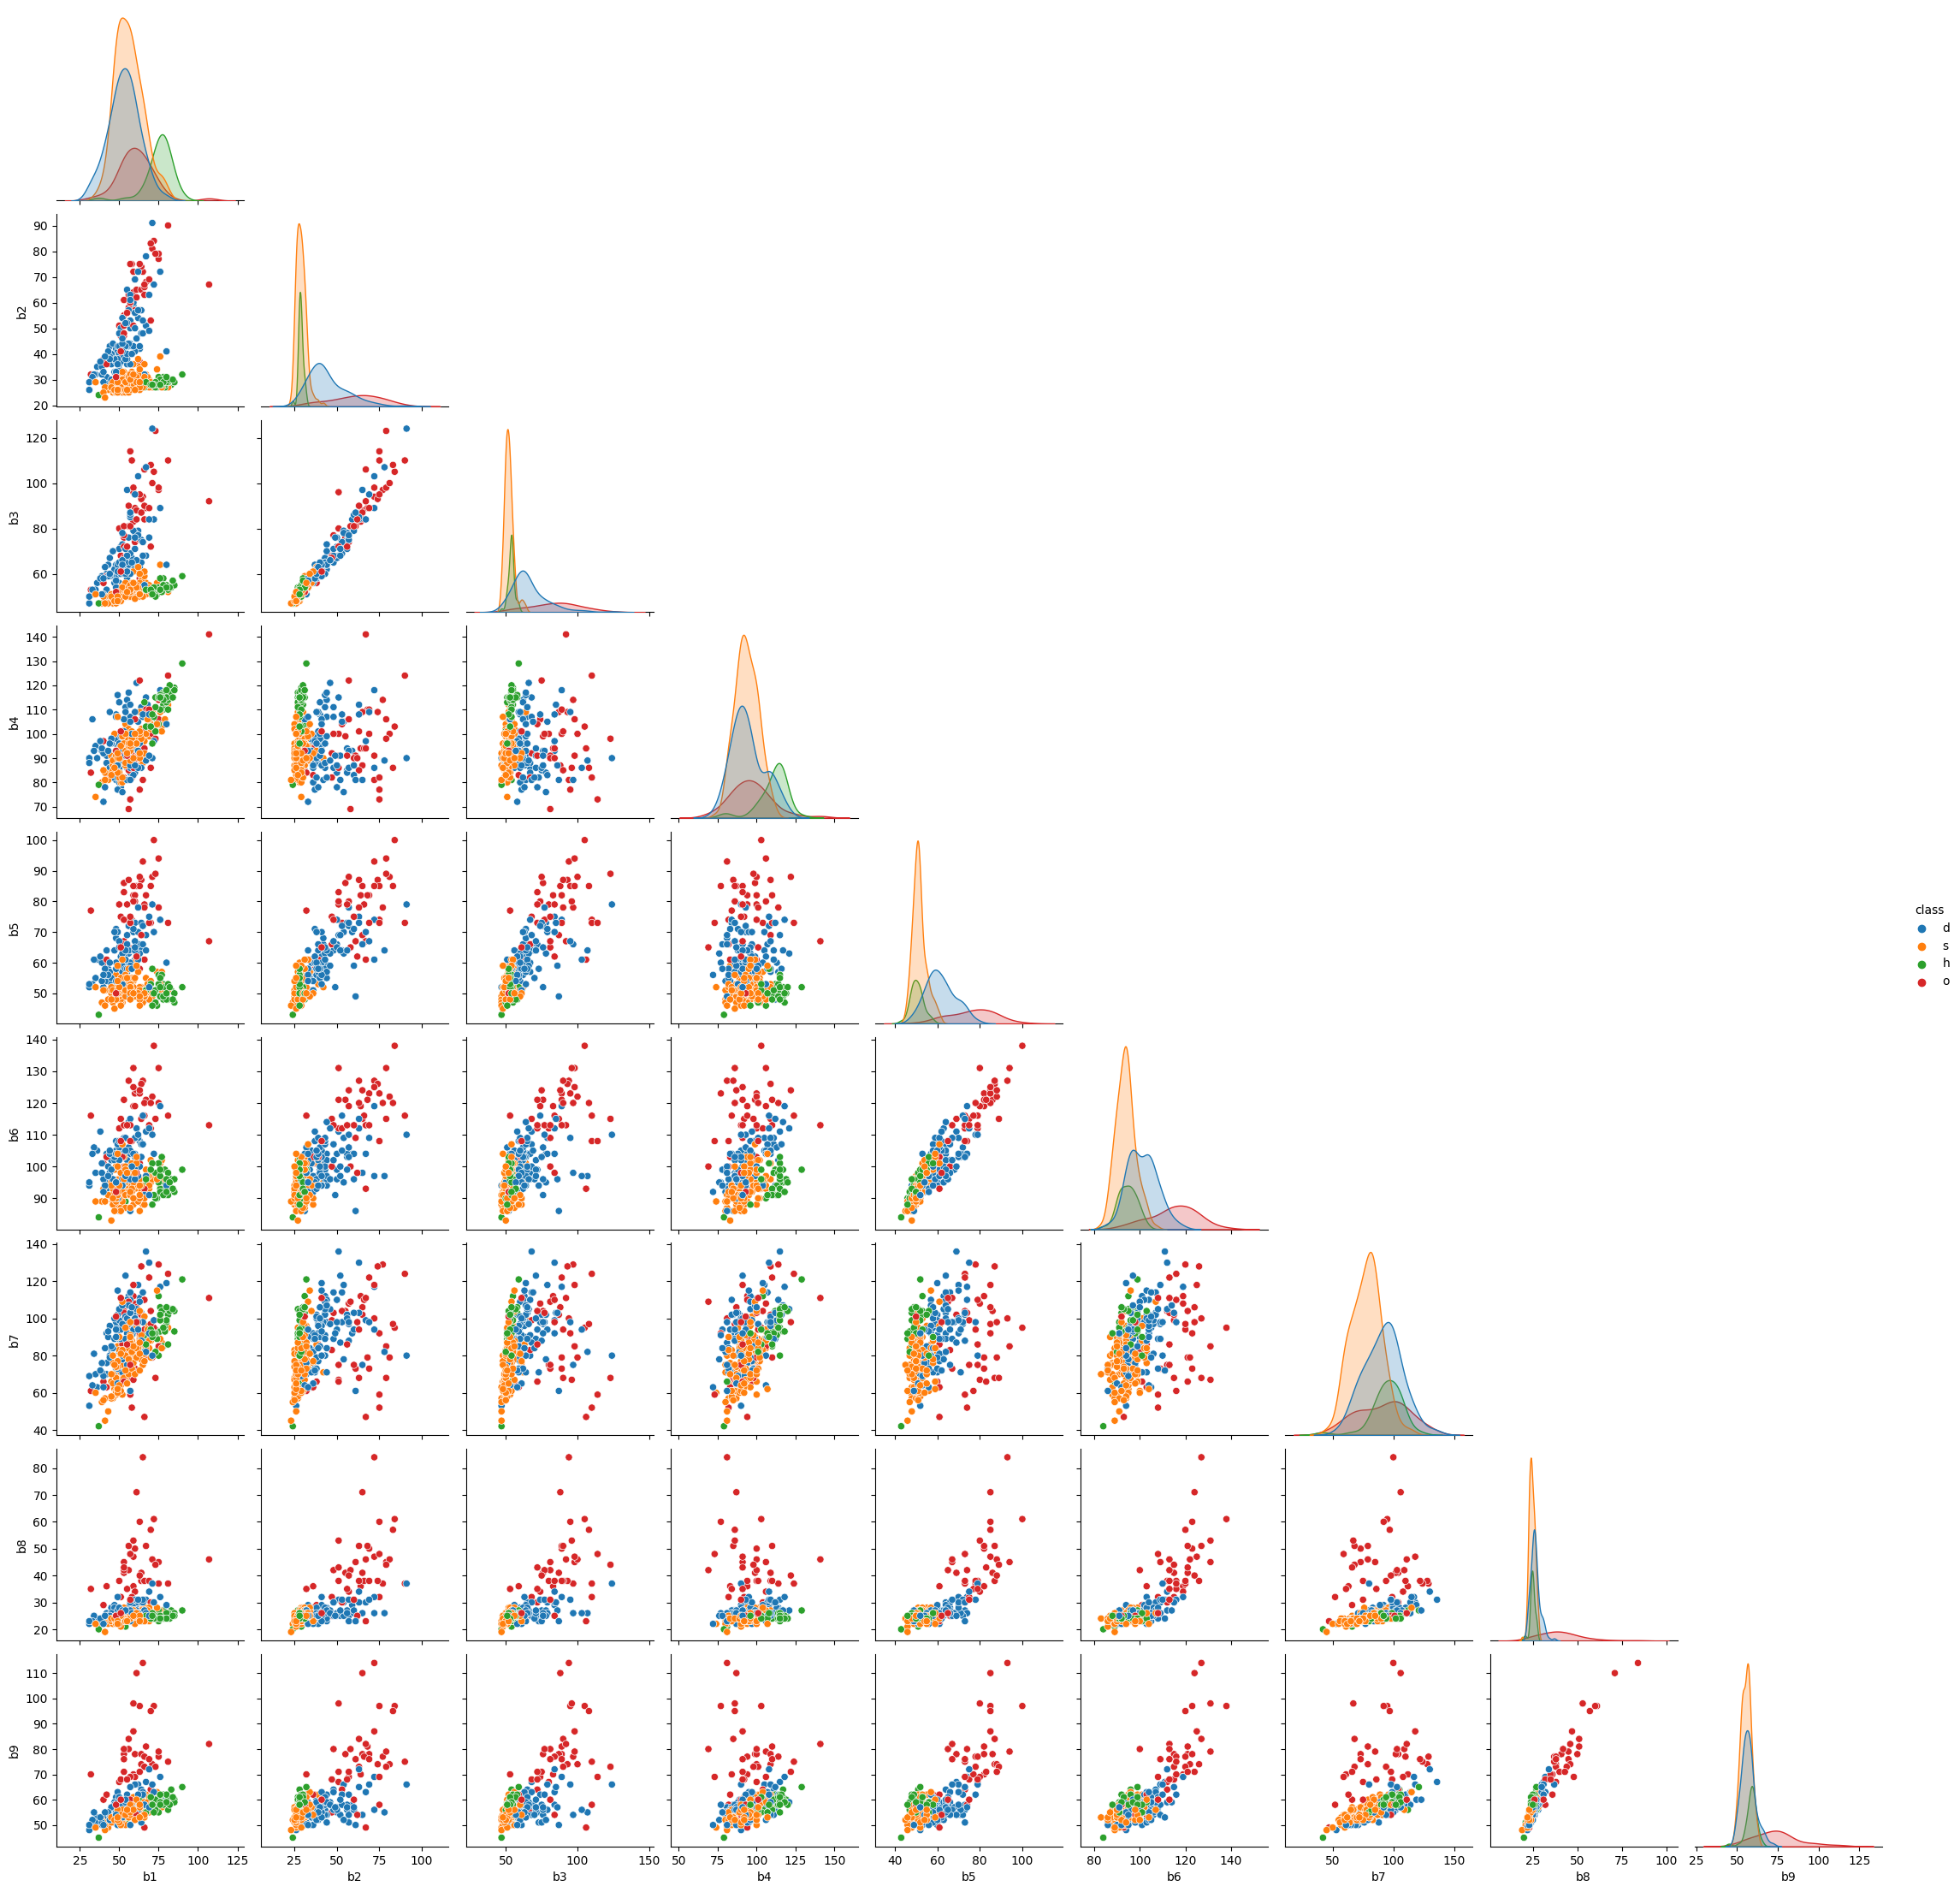

In [18]:
# Using the seaborn visualisation library
sns.pairplot(training_set, diag_kind = 'kde', hue='class', corner=True)

Given that we have 9 numerical variables, it is slightly hard to look at the pairs plot between the covariates. However, we are still able to observe some patterns. It looks like there are some interesting features, for example, the pairs of (b2, b3), (b5, b6) and (b8, b9) are strongly correlated. There are some other pairs that also have a mild positive correlation like (b7, b1) and some where there seems to be no relationship at all, e.g (b4, b5). The chunk below of the correlation matrix gives us a correlation score, putting a numerical value on linear relationships from -1, 1. 

Additionally, there is quite a discernable separation between the 4 classes, especially the red cluster, o, in most of the pairs. This is quite apparent in the kernel densities. Interestingly enough, the s class observation seem to have on average quite low values on most variables. We will revisit this in the classification problem later on.

In [19]:
training_set.corr(method='pearson')

C:\Users\dtyw2\AppData\Local\Temp\ipykernel_26236\3973503926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_set.corr(method='pearson')


,b1,b2,b3,b4,b5,b6,b7,b8,b9
b1,1.000000,0.193934,0.239083,0.659619,0.064797,0.125729,0.538652,0.221787,0.373938
b2,0.193934,1.000000,0.973858,0.007348,0.856469,0.742261,0.371865,0.693000,0.639570
b3,0.239083,0.973858,1.000000,-0.000216,0.811359,0.696819,0.302484,0.687960,0.633026
b4,0.659619,0.007348,-0.000216,1.000000,-0.005669,0.239442,0.523521,0.043042,0.206517
b5,0.064797,0.856469,0.811359,-0.005669,1.000000,0.916407,0.345639,0.773810,0.721207
b6,0.125729,0.742261,0.696819,0.239442,0.916407,1.000000,0.371729,0.773242,0.769371
b7,0.538652,0.371865,0.302484,0.523521,0.345639,0.371729,1.000000,0.268426,0.431312
b8,0.221787,0.693000,0.687960,0.043042,0.773810,0.773242,0.268426,1.000000,0.951385
b9,0.373938,0.639570,0.633026,0.206517,0.721207,0.769371,0.431312,0.951385,1.000000


Next, we want to check for imbalance between the classes in both training and test sets. If we indeed do have an imbalance, then the models that we create later on could have bad predictive perfomance and in a classification sense, lead to poor accuracy and high misclassification scores.

In [20]:
# Count number of instances in each class
train_test_balance = [training_set['class'], test_set['class']]
train_cnts = pd.DataFrame([train_test_balance[0].value_counts(), train_test_balance[0].value_counts(normalize=True)]).transpose()
test_cnts = pd.DataFrame([train_test_balance[1].value_counts(), train_test_balance[1].value_counts(normalize=True)]).transpose()
counts = pd.concat([train_cnts, test_cnts], axis=1)
counts.columns = ['train','prop_train','test','prop_test']
counts

,train,prop_train,test,prop_test
s,136.0,0.418462,59.0,0.297980
d,105.0,0.323077,54.0,0.272727
o,46.0,0.141538,37.0,0.186869
h,38.0,0.116923,48.0,0.242424


Looking at the counts of instances in each class, as well as proportions, we observe that there is clearly an imbalance in the test set between the classes. However, for the test set, the classes are slightly more balanced. 

#### Data and Feature Scaling

In [21]:
training_set

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56
...,...,...,...,...,...,...,...,...,...,...
320,o,55,56,72,91,79,113,86,35,68
321,d,69,49,76,91,52,91,92,25,57
322,s,49,26,48,107,59,104,62,22,53
323,s,55,26,52,92,55,98,65,23,56


Before we perform classification on the training set, we should aim to scale the data. In this case, we use the StandardScaler from the sklearn library, which essentially is a z-score transformer. Scaling will help in perfomance, one of the few reasons for example when we are dealing with distance metric based loss functions in SVMs. 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler() # call the scaler function

num_pipeline = Pipeline([ # pipeline for scaling the data
    ('std_scaler', StandardScaler())
])

# Function to transform given data to scaled, 
def scale_data(data):
    data_num = data.drop(columns='class')
    data_num_tr = num_pipeline.fit_transform(data_num)
    data_num_tr_scaled = pd.DataFrame(data_num_tr, columns=data_num.columns)
    full_scaled_data = pd.concat([data[['class']], data_num_tr_scaled], axis=1)
    return(full_scaled_data)

In [23]:
training_scaled = scale_data(training_set)
testing_scaled = scale_data(test_set)

In [24]:
training_scaled.head(10)

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,0.768240,0.866233,0.436060,1.695451,1.024724,1.252415,3.017089,0.487582,0.915332
1,s,0.768240,-0.712673,-0.698765,0.254401,-0.761240,-0.233114,-0.232568,-0.185016,0.013527
2,s,0.425981,-0.849969,-0.765519,-0.105862,-0.855238,-0.869769,-0.292747,-0.185016,-0.211924
3,d,0.425981,0.248400,0.102288,0.074270,0.742729,0.934087,1.512618,0.084023,0.013527
4,s,-1.028620,-0.781321,-0.765519,-1.186649,-0.667242,-0.975878,-0.593641,-0.185016,-0.324650
5,d,0.083722,1.415417,1.504131,-0.285993,1.118722,0.509651,0.369220,0.218543,-0.099199
6,h,2.137276,-0.712673,-0.498501,1.875582,-0.667242,-0.339223,1.151545,-0.050497,0.577155
7,o,0.425981,-0.094840,-0.231484,-0.105862,-0.009255,0.191323,0.188684,-0.050497,0.351704
8,s,1.623888,-0.644024,-0.632010,0.614663,-0.667242,-0.657550,0.068326,-0.050497,0.013527
9,d,-0.087408,0.385697,0.235797,0.974926,0.084743,0.509651,0.730293,-0.185016,0.013527


### 2. Logistic Regression Classification

In this section, we are tasked to perfom binary classification using the instances in the dataset from 2 forest classes ('s': Sugi and 'd': Mixed deciduous). Hence, for the purposes of this task, we drop all instances of the other 2 classes to keep only the 2 aforementioned. 

In [25]:
def keep_sd(data_scaled):
    omit = data_scaled[(data_scaled['class'] == 's') | (data_scaled['class']=='d')]
    return(omit)

training_scaled_sd, testing_scaled_sd = keep_sd(training_scaled), keep_sd(testing_scaled)

Using Logistic Regression, we aim to fit a classification model to perform binary classification between the Sugi and Mixed Deciduous instances.

In [26]:
training_set_Y = training_scaled_sd.iloc[:,0]
training_set_X = training_scaled_sd.iloc[:,1:]
testing_set_Y = testing_scaled_sd.iloc[:,0]
testing_set_X = testing_scaled_sd.iloc[:,1:]

Using 2 individual features, we perform logistic regression on each ones. Considering the correlation pairwise scatterplot that we called earlier, we could possibly use one covariate where the Sugi (Orange) and Deciduous (blue) where there is good seperation and one where the points are more mixed. We identify these 2 variables arbitarily and they are b2 and b8 respectively

In [27]:
training_set_b2 = training_scaled_sd[['b2']]
training_set_b8 = training_scaled_sd[['b8']]

In [28]:
log_reg_class_b2 = LogisticRegression(random_state=5508)
log_reg_class_b2.fit(training_set_b2.values, training_set_Y)

LogisticRegression(random_state=5508)

<b> We look at the model's estimated probabilities for covariate b2.<b>

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

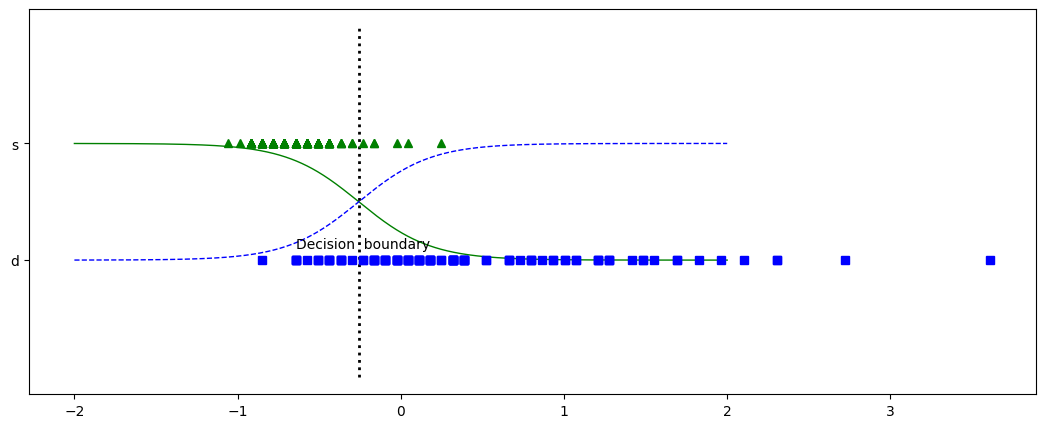

In [29]:
# A fancier model, with additional features
b2_new = np.linspace(-2, 2, 1000).reshape(-1, 1)
y_proba_b2 = log_reg_class_b2.predict_proba(b2_new)
# Components:

#1.Find and define the decision boundary with hyperparameter
decision_boundary_b2 = b2_new[y_proba_b2[:, 0] >= 0.5][0] # hyp = 0.5
plt.figure(figsize=(13, 5)) # figure size
#2. Draw the 2 curves that represent the probability for the 2 classes
plt.plot(b2_new, y_proba_b2[:, 1], "g-", linewidth=1, label="Sugi")
plt.plot(b2_new, y_proba_b2[:, 0], "b--", linewidth=1, label="Deciduous")
#3. Add the decision boundary on the plot
plt.plot([decision_boundary_b2, decision_boundary_b2], [-1, 2], "k:", linewidth=2)
#4. Add actual observations
plt.plot(training_set_b2[training_set_Y == 'd'], training_set_Y[training_set_Y == 'd'],'bs')
plt.plot(training_set_b2[training_set_Y == 's'], training_set_Y[training_set_Y == 's'],'g^')
#5. Add arrows, that point to which class the model assigned based on the decision boundary
plt.text(decision_boundary_b2+0.02, 0.1, "Decision  boundary", fontsize=10, color="k", ha="center")
plt.arrow(decision_boundary_b2, 0.95, -0.3, 0, head_width=0.02, head_length=0.05, fc='g', ec='g')
plt.arrow(decision_boundary_b2, 0.05, 0.3, 0, head_width=0.02, head_length=0.05, fc='b', ec='b')
#6. Misc other figure components
plt.xlabel("b2 (scaled)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=10)
plt.axis([-2, 2, -0.01, 1.01])
plt.title('Logistic Regression Decision Boundary Model on b2 covariate')
plt.show()

In [30]:
# A fancier model, with additional features
training_set_b2.values 

array([[ 0.86623295],
       [-0.71267251],
       [-0.84996863],
       [ 0.24840038],
       [-0.78132057],
       [ 1.41541745],
       [-0.64402445],
       [ 0.3856965 ],
       [-0.64402445],
       [-0.163488  ],
       [-0.78132057],
       [-0.36943219],
       [-0.23213607],
       [-0.50672832],
       [-0.30078413],
       [-0.84996863],
       [-0.57537638],
       [-0.84996863],
       [-0.84996863],
       [-0.64402445],
       [-0.163488  ],
       [-0.57537638],
       [ 0.11110425],
       [-0.84996863],
       [-0.71267251],
       [-0.84996863],
       [ 1.07217713],
       [ 1.20947326],
       [ 0.66028876],
       [ 0.04245619],
       [ 0.11110425],
       [-0.64402445],
       [-0.43808026],
       [-0.64402445],
       [-0.64402445],
       [-0.9186167 ],
       [ 2.30784227],
       [ 0.31704844],
       [-0.71267251],
       [-0.43808026],
       [-0.71267251],
       [-0.64402445],
       [ 0.24840038],
       [-0.71267251],
       [-0.57537638],
       [-0

The value of b2, where the decision boundary of 0.5 seperates the 2 classes.

In [31]:
decision_boundary_b2[0]  # probabilities around 50% for each class

-0.2542542542542543

<b> Model considering the feature b8 <b>

In [32]:
log_reg_class_b8 = LogisticRegression(random_state=5508)
log_reg_class_b8.fit(training_set_b8.values, training_set_Y)

LogisticRegression(random_state=5508)

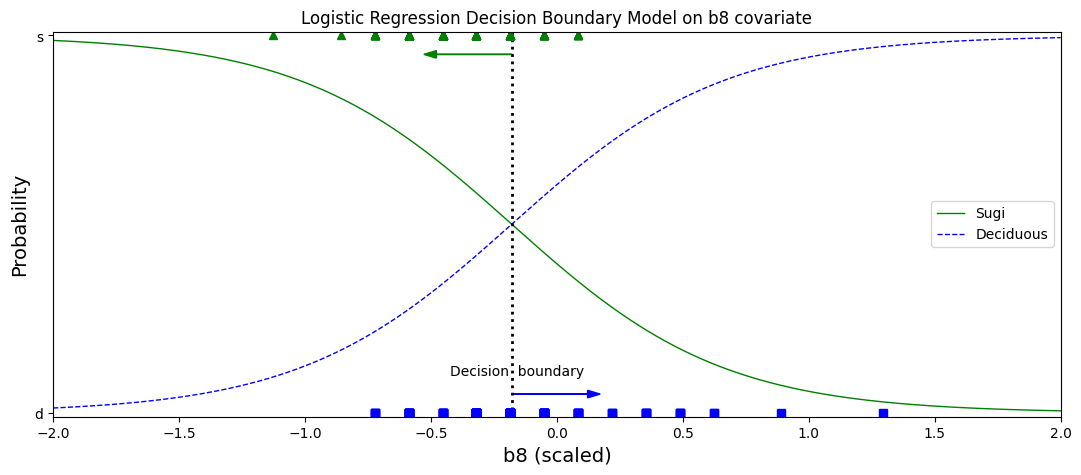

In [33]:
# Model replicated for b8
b8_new = np.linspace(-2, 2, 1000).reshape(-1, 1)
y_proba_b8 = log_reg_class_b8.predict_proba(b8_new)
# Components:

#1.Find and define the decision boundary with hyperparameter
decision_boundary_b8 = b8_new[y_proba_b8[:, 0] >= 0.5][0] # hyp = 0.5
plt.figure(figsize=(13, 5)) # figure size
#2. Draw the 2 curves that represent the probability for the 2 classes
plt.plot(b8_new, y_proba_b8[:, 1], "g-", linewidth=1, label="Sugi")
plt.plot(b8_new, y_proba_b8[:, 0], "b--", linewidth=1, label="Deciduous")
#3. Add the decision boundary on the plot
plt.plot([decision_boundary_b8, decision_boundary_b8], [-1, 2], "k:", linewidth=2)
#4. Add actual observations
plt.plot(training_set_b8[training_set_Y == 'd'], training_set_Y[training_set_Y == 'd'],'bs')
plt.plot(training_set_b8[training_set_Y == 's'], training_set_Y[training_set_Y == 's'],'g^')
#5. Add arrows, that point to which class the model assigned based on the decision boundary
plt.text(decision_boundary_b8+0.02, 0.1, "Decision  boundary", fontsize=10, color="k", ha="center")
plt.arrow(decision_boundary_b8[0], 0.95, -0.3, 0, head_width=0.02, head_length=0.05, fc='g', ec='g')
plt.arrow(decision_boundary_b8[0], 0.05, 0.3, 0, head_width=0.02, head_length=0.05, fc='b', ec='b')
#6. Misc other figure components
plt.xlabel("b8 (scaled)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=10)
plt.axis([-2, 2, -0.01, 1.01])
plt.title('Logistic Regression Decision Boundary Model on b8 covariate')
plt.show()

In [34]:
decision_boundary_b8[0] # probabilities around 50% for each class

-0.17817817817817816

Considering the two plots above, we can see that on the b2 variable, Sugi instances tend to have smaller values compared to the Deciduous, similarly for the b8 variable, however, smaller. The logistic regression model for the two variables still show quite a good amount of overlap (misclassification), especially for the b8 variable. It can be quite hard to see this on the plot above because there are instances that have the same value. Nevertheless, to see how our models on the 2 variables performed with a decision boundary of 0.5, we want to see some accuracy scores on the training and test sets.

In [35]:
# Seperate the b2 and b8 arrays the test set.
test_set_b2 = testing_scaled_sd[['b2']]
test_set_b8 = testing_scaled_sd[['b8']]

In [36]:
from sklearn.metrics import accuracy_score

# create a function to calculate the accuracy score
def calculate_accuracy(model, dataset, actual):
    pred = model.predict(dataset.values)
    train_score = accuracy_score(actual, pred)
    return(train_score)

In [37]:
train_acc_b2 = calculate_accuracy(log_reg_class_b2, training_set_b2, training_set_Y)
train_acc_b8 = calculate_accuracy(log_reg_class_b8, training_set_b8, training_set_Y)
test_acc_b2 = calculate_accuracy(log_reg_class_b2, test_set_b2, testing_set_Y)
test_acc_b8 = calculate_accuracy(log_reg_class_b8, test_set_b8, testing_set_Y)
print('Training accuracy b2: {}'.format(train_acc_b2))
print('Test accuracy b2: {}'.format(test_acc_b2))
print('Training accuracy b8: {}'.format(train_acc_b8))
print('Test accuracy b8: {}'.format(test_acc_b8))

# We can also use the score function built into the sklearn.logregression model

Training accuracy b2: 0.9004149377593361
Test accuracy b2: 0.9823008849557522
Training accuracy b8: 0.6514522821576764
Test accuracy b8: 0.5398230088495575


Considering the models and the accuracy scores above with both decision boundaries set at 0.5, we can see that for model b2, the test accuracy is higher than the training accuracy, but the model b8 performs poorer on the test set relative to the model b2.

<b> Model considering all variables b1-b9 <b>

First, we train the model on the training set X.

In [38]:
# call the logistic regression model
log_reg_class_all = LogisticRegression(random_state=5508)
log_reg_class_all.fit(training_set_X, training_set_Y)

LogisticRegression(random_state=5508)

Then, we pick out 10 random instances from the test set and use the model that we have just fitted to give us a linear score, which allows us to plot the points below.

In [39]:
# Picking 10 random instances from the test_set
random_obs = np.random.choice(testing_set_X.shape[0], size=10, replace=False)
test_rand_x, test_rand_y = testing_set_X.iloc[random_obs,:], testing_set_Y.iloc[random_obs,]

In [40]:
# Predicting the classes using the model and getting the linear score (x value on axis)
pred_class_10 = log_reg_class_all.predict(test_rand_x)
pred_prob_10 = log_reg_class_all.predict_proba(test_rand_x)
score_10 = log_reg_class_all.decision_function(test_rand_x)
score_10

array([-4.7619252 ,  1.61617901, -4.90351056,  3.28996231, -4.29806083,
        3.67762245,  4.61604172, -3.51273177, -7.11141489,  3.10744036])

Creating the plot:

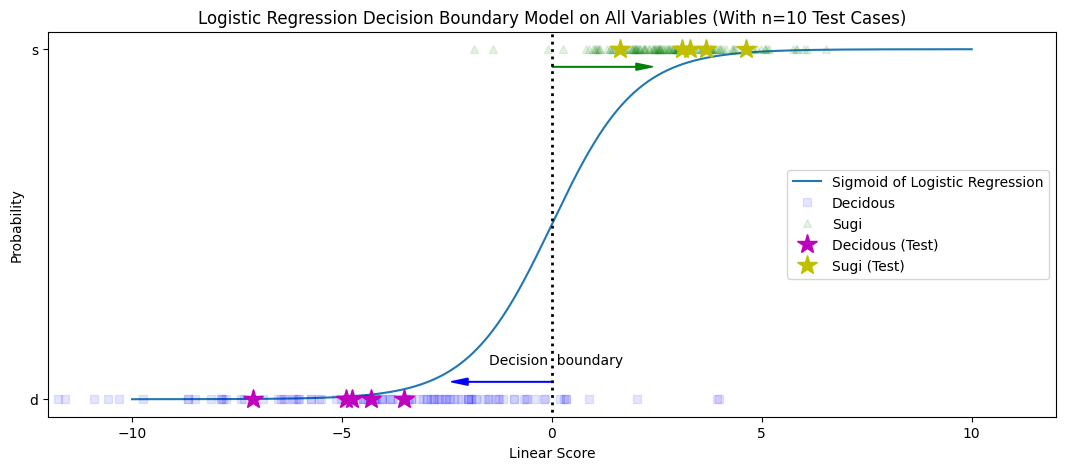

In [41]:
from scipy.special import expit
# Score value of the LR Model:
x = log_reg_class_all.decision_function(training_set_X)
min(x), max(x) #(-17.02, 6.51)
b_new = np.linspace(-10, 10, 5000).reshape(-1, 1)
b_new_prob = expit(b_new).ravel()
plt.figure(figsize=(13, 5)) # figure size

# 
decision_boundary_all = b_new[b_new_prob >= 0.5][0] # hyper = 0.5
plt.plot(b_new, b_new_prob, label ='Sigmoid of Logistic Regression')
plt.plot(x[training_set_Y == 'd'], training_set_Y[training_set_Y == 'd'],'bs', label='Decidous', alpha=0.1)
plt.plot(x[training_set_Y == 's'], training_set_Y[training_set_Y == 's'],'g^', label='Sugi', alpha=0.1)
plt.plot(score_10[test_rand_y == 'd'], test_rand_y[test_rand_y == 'd'],'m*', label='Decidous (Test)', markersize=15)
plt.plot(score_10[test_rand_y == 's'], test_rand_y[test_rand_y == 's'],'y*', label='Sugi (Test)', markersize=15)
plt.plot([decision_boundary_all, decision_boundary_all], [-1, 2], "k:", linewidth=2)
plt.axis([-12, 12, -0.05, 1.05])
plt.arrow(decision_boundary_all[0], 0.95, 2, 0, head_width=0.02, head_length=0.4, fc='g', ec='g')
plt.arrow(decision_boundary_all[0], 0.05, -2, 0, head_width=0.02, head_length=0.4, fc='b', ec='b')
plt.xlabel("Linear Score", fontsize=10)
plt.ylabel("Probability", fontsize=10)
plt.legend(loc="center right", fontsize=10)
plt.title('Logistic Regression Decision Boundary Model on All Variables (With n=10 Test Cases)')
plt.text(decision_boundary_all+0.1, 0.1, "Decision  boundary", fontsize=10, color="k", ha="center")
plt.show()

By looking at the plot above, together with the actual class of the 10 random test points, we can observe that the logistic regression model correctly classifies the 10 points, given the decision boundary of 50%. Additionally, we want to look at the accuracy scores on both the training set and the test set of 10 random instances.

In [42]:
print("Accuracy of training set: ", log_reg_class_all.score(training_set_X, training_set_Y))
print("Accuracy of 10 random test points: ", log_reg_class_all.score(test_rand_x, test_rand_y))

Accuracy of training set:  0.9543568464730291
Accuracy of 10 random test points:  1.0


The model classifies the points well!

Also, just to compare the Logistic Regression model with the SGDClassifier Logistic Regression, we want to see how well the normal model does. 

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_class = SGDClassifier(loss='log_loss', max_iter=100)
sgd_class.fit(training_set_X, training_set_Y)
print("Accuracy of training set: ", sgd_class.score(training_set_X, training_set_Y))
print("Accuracy of 10 random test points: ", sgd_class.score(test_rand_x, test_rand_y))

Accuracy of training set:  0.946058091286307
Accuracy of 10 random test points:  1.0


Not bad, accuracy on the training set using the SGDClassifier is not significantly higher than the normal model!

<b> Performance Measures (Precision and Recall) <b>

Recall from the previous model that the decision boundary score value of 0.002, was determined for a 50% decision boundary threshold. This meant that for scores higher than the decision boundary score of 0.002, the classifier would classify the observation to be Sugi, and Deciduous (Not Sugi) otherwise.  

In [100]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

In [45]:
decision_boundary_all # decision boundary at 50%

array([0.0020004])

In [46]:
a = log_reg_class_all.predict(training_set_X)
b = np.array(training_set_Y)
cm = confusion_matrix(a,b)
cm

array([[ 97,   3],
       [  8, 133]], dtype=int64)

In [47]:
print(precision_score(a,b, pos_label="s"),',', recall_score(a,b, pos_label='s'))

0.9779411764705882 , 0.9432624113475178


In [48]:
from sklearn.model_selection import cross_val_predict
y_scores = log_reg_class_all.decision_function(training_set_X)
precisions, recalls, thresholds = precision_recall_curve(training_set_Y, y_scores, pos_label='s')

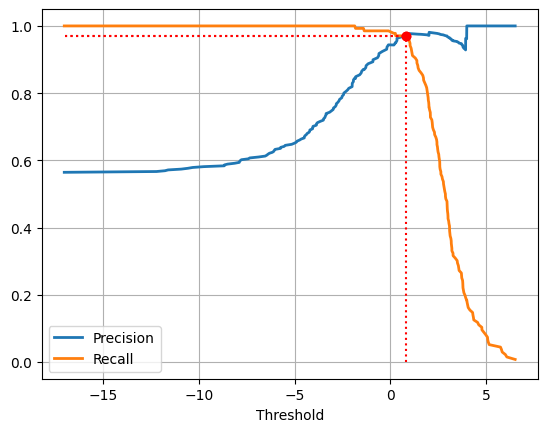

In [49]:
# Adjust the variables later 
plt.plot(thresholds, precisions[:-1], label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=10)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)

hyperparameter = precisions[precisions == recalls] # precision recall trade off balance

recall_precision = recalls[np.argmax(precisions >= hyperparameter)]
threshold_precision = thresholds[np.argmax(precisions >= hyperparameter)]

plt.plot([threshold_precision, threshold_precision], [0., recall_precision], "r:")  
plt.plot([-17, threshold_precision], [hyperparameter,hyperparameter], "r:")    
plt.plot([-17, threshold_precision], [recall_precision, recall_precision], "r:")
plt.plot([threshold_precision], [hyperparameter], "ro")   
plt.plot([threshold_precision], [recall_precision], "ro")    

In [50]:
precisions[precisions == recalls]

array([0.97058824])

In [51]:
threshold_precision # new decision boundary based on the precsion recall trade off

0.8090185602643678

Looking at the precision and recall, we can deduce that the optimal hyperparameter for precision is around 0.97, which is the intesection between the precision vs. recall curve. This then relates to the threshold at around 0.809. Since we are not classifying anything on particular important applications, we pick this model instead of something with higher precision or recall scores.

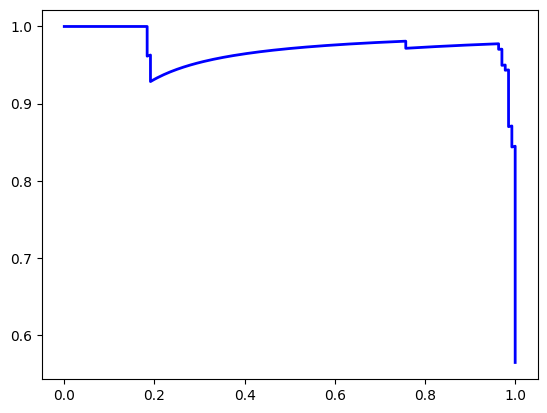

In [52]:
# Add other elements later for precision-recall curve, everything below this is testing
plt.plot(recalls, precisions, 'b-', linewidth = 2)

In [53]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
f1_score(a, b, pos_label='s') # a is the predicted vector, b is the actual vector
roc_auc_score(a, y_scores)

1.0

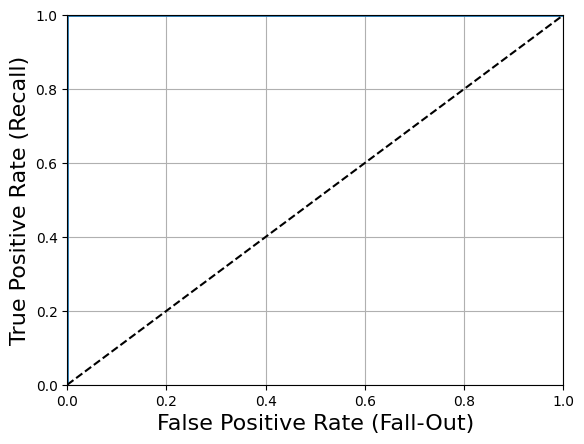

In [54]:
fpr, tpr, thresholds = roc_curve(a, y_scores, pos_label = 's')
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
plt.grid(True)

<b>k-Nearest Neighbours Algorithm for Binary Classification<b>

In [89]:
from sklearn.neighbors  import KNeighborsClassifier

In [56]:
# Define the function to test for more values of k.

n_list = [2,3,4,5,6,7]

def k_test_accuracy(n_list, X, Y, test_X, test_Y):
    for i in n_list:
        knn_model = KNeighborsClassifier(weights='distance', n_neighbors=i)
        knn_model.fit(X, Y)
        train_pred, test_pred = knn_model.predict(X), knn_model.predict(test_X)
        scores = [accuracy_score(train_pred,Y), accuracy_score(test_pred, test_Y)]
        print('Neighbours {}: \t Training Accuracy: {} \t Test Accuracy: {}'.format(i, scores[0], scores[1]))

k_test_accuracy(n_list, training_set_X, training_set_Y, testing_set_X, testing_set_Y)

Neighbours 2: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9823008849557522
Neighbours 3: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9911504424778761
Neighbours 4: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9911504424778761
Neighbours 5: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9911504424778761
Neighbours 6: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9911504424778761
Neighbours 7: 	 Training Accuracy: 1.0 	 Test Accuracy: 0.9911504424778761


By looking at the training accuracy for k-neighbours of 2,3,4,5,6 and 7. We can observe that the 3 nearest neighbours gives us the best test accuracy with the least amount of neighbours, so we pick that model since all models gives us a perfect score on the training data.

<b>Logistic Regression vs k-NN<b>

Given that we have used both methods for binary classification, we can now compare the two models by using some other performance metrics. We start with the confusion matrix, where it tells us the number of given observations that are correctly classified by the classifier, as well as an accuracy score

In [57]:
# Logistic Regression (Threshold: 0.80901856)
# Using the threshold that we determined earlier. 
threshold_precision

# creates a mask of T or F on sugi then applying the mask.
pred_mask = log_reg_class_all.decision_function(testing_set_X) >= threshold_precision
sugi_class_pred = np.where(pred_mask, 's', 'd')
m_acc = accuracy_score(sugi_class_pred, testing_set_Y)

# Confusion Matrix (Testing Set)
cm = confusion_matrix(sugi_class_pred, testing_set_Y)
pcm = pd.DataFrame(cm, index=['d','s'], columns=['d','s'])
print(m_acc)
pcm

0.9911504424778761


,d,s
d,54,1
s,0,58


The confusion matrix of the Logistic Regression model with pre-determined threshold shows us that there is only 1 incorrect classification on the test set, with an accuracy score of about 99.1%. We would consider the classifier to be quite good.

Next, we consider the k-NN classifier.

In [66]:
knn_model3 = KNeighborsClassifier(weights = 'distance', n_neighbors = 3)

In [74]:
knn_model3.fit(training_set_X, training_set_Y)
pred_knn3 = knn_model3.predict(testing_set_X)
m_acc = accuracy_score(pred_knn3, testing_set_Y)
cm = confusion_matrix(pred_knn3, testing_set_Y)
pcm = pd.DataFrame(cm, index=['d','s'], columns=['d','s'])
print(m_acc)
pcm

0.9911504424778761


,d,s
d,54,1
s,0,58


Similarly, for both models, the confusion matrix and accuracy scores are the same. Both do well in predicting the classes.

<b> ROC Curves for TP and FP rates <b>

Starting with the KNN, please do the plt side by side later.

In [86]:
y_predknn3 = knn_model3.predict_proba(testing_set_X)
fpr, tpr, thresholds = roc_curve(testing_set_Y, y_predknn3[:,1], pos_label='s')

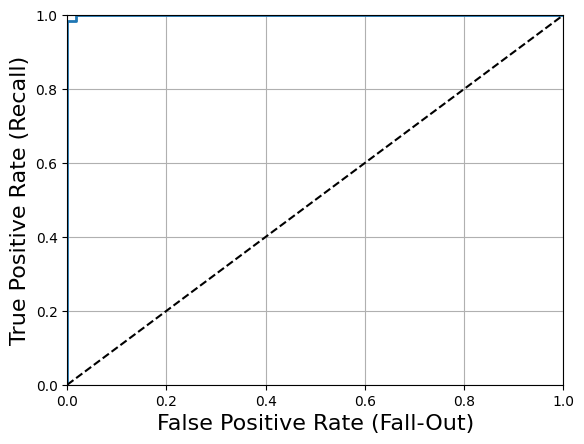

In [87]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.grid(True)

plot_roc_curve(fpr, tpr)

In [91]:
roc_auc_score(testing_set_Y, y_predknn3[:,1])

0.9996861268047709

1.0

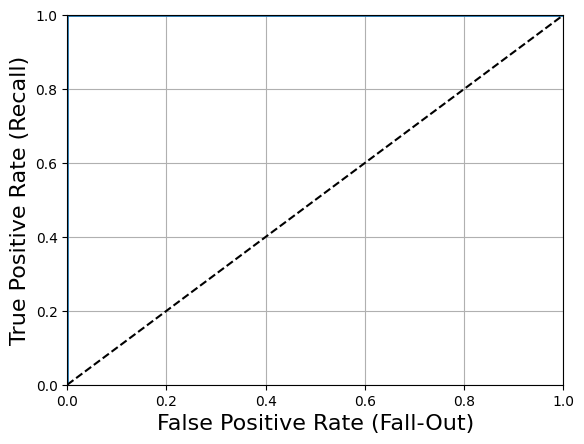

In [95]:
y_predLR = log_reg_class_all.decision_function(testing_set_X)
fpr, tpr, thresholds = roc_curve(testing_set_Y, y_predLR, pos_label='s')
plot_roc_curve(fpr, tpr)
roc_auc_score(testing_set_Y, y_predLR)

Difference between accuracy score and ROC AUC score: 

- ROC AUC compares the relation between the TPR and the FPR (Area Under Curve)
- Accuracy is just the percentage of correct predictions

<b> Using 3-fold CV to assess the generalisation capacity for the 2 classifiers<b>

In [104]:
# First on the Logistic Regression

LR_CV3 = cross_val_score(log_reg_class_all, training_set_X, training_set_Y, cv=3)
KN_CV3 = cross_val_score(knn_model3, training_set_X, training_set_Y, cv=3)
print(LR_CV3, KN_CV3)

[0.92592593 0.975      0.95      ] [0.92592593 0.95       0.925     ]


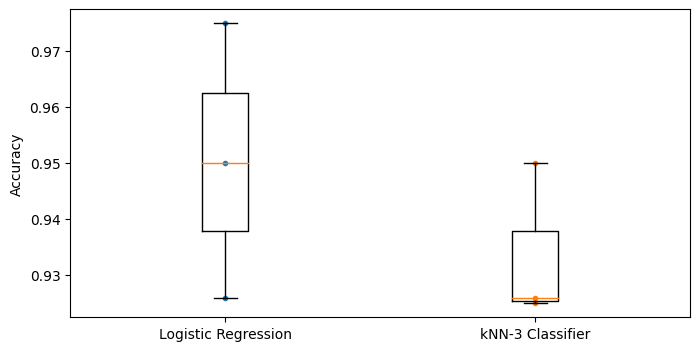

In [114]:
plt.figure(figsize=(8,4))
plt.plot([1]*3, LR_CV3, '.'); plt.plot([2]*3, KN_CV3, '.')
plt.boxplot([LR_CV3, KN_CV3], labels=("Logistic Regression", "kNN-3 Classifier"))
plt.ylabel("Accuracy", fontsize=10)
plt.show()

In [ ]:
# Create function to 